## 0314 作業
- 有一糖尿病資料集 (X: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ;目標y: outcome),請使用以下方法建立模型,並且比較個模型的準確度

- 使用sklearn 的決策樹建立分類模型
- 使用sklearn 的邏輯式回歸建立分類模型
- 使用ANN 的類神經網路建立分類模型
- 比較各模型的準確度

In [0]:
names= ['David', 'John', 'Marry']
height = [180,175, 165]
weight = [80,75, 50]


import numpy 
nh = numpy.array(height)
nw = numpy.array(weight)


In [0]:
bmi = nw / (nh / 100) ** 2
bmi

array([24.69135802, 24.48979592, 18.36547291])

In [0]:
nn = numpy.array(names)
nn

array(['David', 'John', 'Marry'], dtype='<U5')

In [0]:
numpy.column_stack((nn, bmi))

array([['David', '24.691358024691358'],
       ['John', '24.489795918367346'],
       ['Marry', '18.36547291092746']], dtype='<U32')

In [0]:
import pandas
pandas.Series(bmi, index = nn)

David    24.691358
John     24.489796
Marry    18.365473
dtype: float64

In [0]:
import pandas
diabetes = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/diabetes.csv')

In [0]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
X = diabetes.iloc[:,:-1]

In [0]:
y = diabetes.iloc[:,-1]

### 使用sklearn 的決策樹建立分類模型

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 使用sklearn 的邏輯式回歸建立分類模型

In [0]:
from sklearn import linear_model
clf2 = linear_model.LogisticRegression()
clf2.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 使用ANN 的類神經網路建立分類模型

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2 = sc.fit_transform(X)

In [0]:
X2

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [0]:
# input 8
# hidden 8 / 2 = 4
# activation: sigmoid
# output: Softmax => 2, sigmoid => 1 

In [0]:
import numpy as np

In [0]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

In [0]:
class ANN(object):
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
 
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [0]:
net = ANN(input_size=8, hidden_size=4, output_size=2)

In [0]:
X2.shape

(768, 8)

In [0]:
y2 = np.zeros((len(y), 2))
for idx, val in enumerate(y):
    y2[idx, val] = 1

In [0]:
y2

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [0]:
import time
epochs = 3000
lr     = 0.01
a = time.clock()
train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(X2,y2)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(X2, y2)
    train_loss.append(loss)
time.clock() - a

66.632683

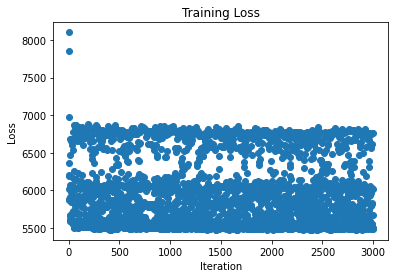

In [0]:
import matplotlib.pyplot as plt
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [0]:
def mean_squared_err(y_hat, y):
        return 0.5 * np.sum((y_hat - y) ** 2) 

class ANN2(object):
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
 
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid_function(a2)
        return y
       
    def loss(self, x, y):
        y_hat = self.predict(x)
        return mean_squared_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [0]:
net2 = ANN2(input_size=8, hidden_size=4, output_size=1)

In [0]:
X2.shape

(768, 8)

In [0]:
y3 = y.values.reshape(-1,1)

In [0]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [0]:
y3[0:5,:]

array([[1],
       [0],
       [1],
       [0],
       [1]])

In [0]:
y3.shape

(768, 1)

In [0]:
import time
epochs = 3000
lr     = 0.01
a = time.clock()
train_loss = []
for i in range(epochs):         
    grad = net2.numerical_gradient(X2,y3)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net2.params[key] = net2.params[key] - lr * grad[key]
    loss = net2.loss(X2, y3)
    train_loss.append(loss)
time.clock() - a

34.510215

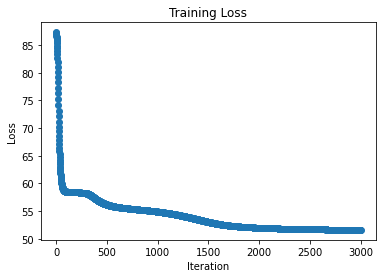

In [0]:
import matplotlib.pyplot as plt
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


### 比較各模型的準確度

In [0]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
from sklearn.metrics import accuracy_score
predicted1 = clf.predict(X)
(predicted1 == y).sum() / len(y)
accuracy_score(y, predicted1)

1.0

In [0]:
clf2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
predicted2 = clf2.predict(X)
accuracy_score(y, predicted2)

0.7825520833333334

In [0]:
net2

In [0]:
predicted3 = ((net2.predict(X2) > 0.5)).astype(int)

In [0]:
accuracy_score(y3, predicted3)

0.8177083333333334

In [0]:
from sklearn import neural_network
clf3 = neural_network.MLPClassifier((4,))
clf3.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
from sklearn.preprocessing import StandardScaler
a = numpy.array([50,60,70,])
sc = StandardScaler()
sc.fit_transform(a.reshape(-1,1))

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [0]:
sc.mean_

array([60.])

In [0]:
sc.var_

array([66.66666667])

In [0]:
(a - sc.mean_ ) / (sc.var_ ** 0.5 )

array([-1.22474487,  0.        ,  1.22474487])

In [0]:
b = numpy.array([[80]])

In [0]:
sc.transform(b)

array([[2.44948974]])

In [0]:
10, 90 
90%

## 反向傳播算法
- https://www.wolframalpha.com/input/?i=derivative+1%2Fx

In [0]:
class Relu(object):
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        self.cache = (x <=0)
        out = np.maximum(0,x)
        return out

    def backward(self, dout):
        dout[self.cache] = 0
        dx = dout
        return dx

In [0]:
a = Relu()
print(a.cache)

None


In [0]:
ary = numpy.array([-1,1,2])
a.forward(ary)

array([0, 1, 2])

In [0]:
print(a.cache)

[ True False False]


In [0]:
out = numpy.array([2,2,2])
a.backward(out)

array([0, 2, 2])

In [0]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1/ (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        y  = self.out
        dx = dout * y * (1-y)
        return dx

In [0]:
s = Sigmoid()
print(s.out)

None


In [0]:
ary = numpy.array([-1,1,2])
s.forward(ary)

array([0.26894142, 0.73105858, 0.88079708])

In [0]:
print(s.out)

[0.26894142 0.73105858 0.88079708]


In [0]:
out = numpy.array([2,2,2])
s.backward(out)

array([0.39322387, 0.39322387, 0.20998717])

In [0]:
y = s.out
y * (1 - y) * out

array([0.39322387, 0.39322387, 0.20998717])

In [0]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout)
        return dx

In [0]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y_hat = None 
        self.y = None 

    def forward(self, x, y):
        self.y = y
        self.y_hat = softmax_function(x)
        self.loss = cross_entropy_err(self.y_hat, self.y)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        dx = (self.y_hat - self.y) / batch_size
        return dx

In [0]:
def softmax_function(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [0]:
import numpy as np
from collections import OrderedDict

class ANN:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return self.lastLayer.forward(y_hat, y)
  
    def gradient(self, x, y):
        # forward
        self.loss(x, y)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [0]:
import random
import time

epochs     = 3000
lr         = 0.01
batch_size = 30

net = ANN(input_size=4, hidden_size=5, output_size=3)

t0 = time.perf_counter()
train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
    
time.perf_counter() - t0

0.7749787889997606

Text(0.5, 1.0, 'Training Loss')

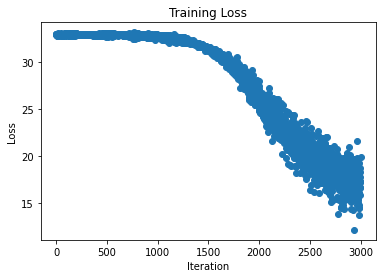

In [0]:
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [0]:
import random
import time

epochs     = 10000
lr         = 0.01
batch_size = 30

net = ANN(input_size=4, hidden_size=5, output_size=3)

t0 = time.perf_counter()
train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
    
time.perf_counter() - t0

2.581124841000019

Text(0.5, 1.0, 'Training Loss')

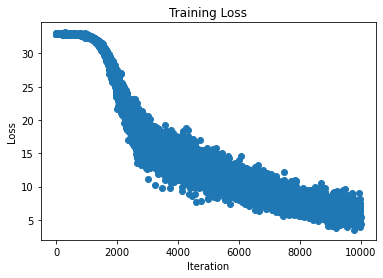

In [0]:
plt.scatter(range(0,10000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [0]:
predicted = np.argmax(net.predict(x), axis = 1)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.98

## 使用sklearn 建立 ANN

In [0]:
! wget https://res.cloudinary.com/enjoymovie/image/upload/w_256,h_256,c_fill,g_auto:faces/dc5r41ei2dcgwkyyoza3.jpg

--2020-03-21 04:07:23--  https://res.cloudinary.com/enjoymovie/image/upload/w_256,h_256,c_fill,g_auto:faces/dc5r41ei2dcgwkyyoza3.jpg
Resolving res.cloudinary.com (res.cloudinary.com)... 151.101.1.137, 151.101.65.137, 151.101.129.137, ...
Connecting to res.cloudinary.com (res.cloudinary.com)|151.101.1.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13040 (13K) [image/jpeg]
Saving to: ‘dc5r41ei2dcgwkyyoza3.jpg’

dc5r41ei2dcgwkyyoza 100%[===================>]  12.73K  --.-KB/s    in 0.007s  

2020-03-21 04:07:23 (1.87 MB/s) - ‘dc5r41ei2dcgwkyyoza3.jpg’ saved [13040/13040]



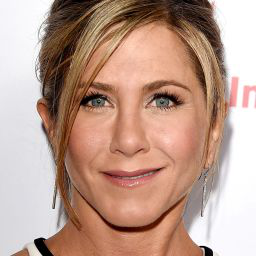

In [0]:
from PIL import Image
img = Image.open('dc5r41ei2dcgwkyyoza3.jpg')
img

In [0]:
import numpy as np
im = np.array(img)

In [0]:
im.shape

(256, 256, 3)

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

In [0]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [0]:
digits.data.shape

(1797, 64)

In [0]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [0]:
a = digits.data[0].reshape((8,8))

In [0]:
a

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

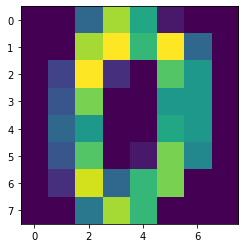

In [0]:
from matplotlib import pyplot as plt
plt.imshow(a)

In [0]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

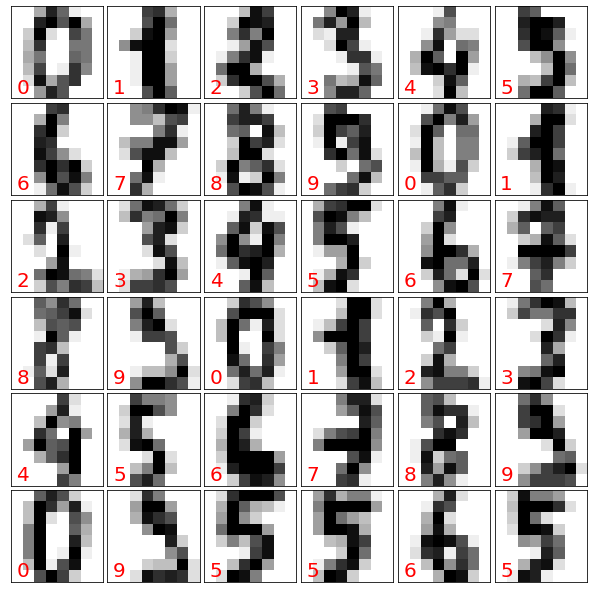

In [0]:
# 畫布大小 8 * 8
fig = plt.figure(figsize = (8,8))

# 圖與圖的間距
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 取樣36 張圖
for i in range(36):
    # 每張 6 * 6 的大小
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    # 繪製灰階圖
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    # 於左下標示紅色大小為20數字
    ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(digits.data)

In [0]:
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [0]:
X_scaled.shape

(1797, 64)

In [0]:
from sklearn.neural_network import MLPClassifier
?MLPClassifier

In [0]:
#epoch: 1000
#solver: stochastic gradient descent
#input: 64 => hidden1(relu): 30 => hidden2(relu): 30 => hidden3(relu): 30 => output(softmax): 10

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), 
                    activation='relu', 
                    max_iter = 1000,
                    solver='sgd',
                    learning_rate='constant',
                    learning_rate_init=0.001)

mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
predicted = mlp.predict(X_scaled)
predicted

array([0, 1, 2, ..., 8, 9, 8])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, predicted)

0.9977740678909294

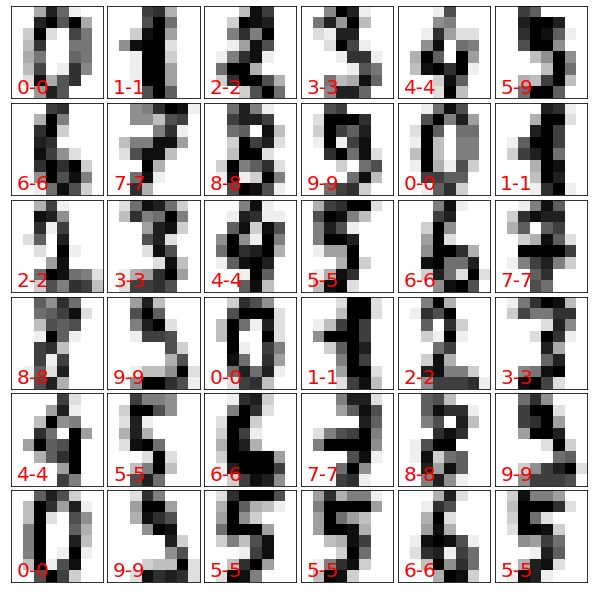

In [0]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)

In [0]:
! wget https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/unknown_digits.bmp

--2020-03-21 04:26:19--  https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/unknown_digits.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150 [image/bmp]
Saving to: ‘unknown_digits.bmp’

unknown_digits.bmp  100%[===================>]     150  --.-KB/s    in 0s      

2020-03-21 04:26:20 (31.7 MB/s) - ‘unknown_digits.bmp’ saved [150/150]



In [0]:
im = numpy.array(Image.open('unknown_digits.bmp'))

In [0]:
im2 = (15 - im).reshape(64,)
im2

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0, 15,  0,  0,  0,  0,
        0, 15,  0, 15,  0,  0,  0,  0, 15, 15,  0, 15,  0,  0,  0,  0, 15,
        0,  0, 15,  0,  0,  0, 15, 15, 15, 15, 15, 15, 15,  0,  0,  0,  0,
        0, 15,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0], dtype=uint8)

In [0]:
src = sc.transform([im2])

In [0]:
src

array([[ 0.00000000e+00, -3.35016487e-01, -1.09493684e+00,
        -2.78643746e+00, -2.76424203e+00, -1.02065685e+00,
        -4.09723921e-01, -1.25022923e-01, -5.90775571e-02,
        -6.24009262e-01,  8.51981802e-01, -3.01259995e+00,
         9.87303977e-01, -1.35109507e+00, -5.14991458e-01,
        -1.30433381e-01, -4.46250733e-02, -7.27646281e-01,
         8.95880438e-01, -1.20543167e+00,  1.27989088e+00,
        -1.25998248e+00, -5.48805463e-01, -1.14221844e-01,
        -3.33797263e-02,  3.98337420e+00,  9.54513151e-01,
        -1.49990136e+00,  8.24810596e-01, -1.28625035e+00,
        -6.28895882e-01, -4.72323823e-02,  0.00000000e+00,
         3.63871114e+00, -1.21260656e+00, -1.44763006e+00,
         7.92062324e-01, -1.48986148e+00, -8.22694515e-01,
         0.00000000e+00,  1.03283569e+02,  4.50060728e+00,
         1.24209958e+00,  1.20688552e+00,  1.17098727e+00,
         1.18784054e+00,  2.66613420e+00, -8.87416172e-02,
        -3.54332626e-02, -4.03574986e-01, -1.33033057e+0

In [0]:
mlp.predict(src)

array([4])

In [0]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (30, 30, 30),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [0]:
mlp.coefs_[0].shape

(64, 30)

In [0]:
from joblib import dump, load
dump(mlp, 'mlp.joblib') 

['mlp.joblib']

In [0]:
clf2 = load('mlp.joblib') 

## 請使用 MLPClassfier 建立 iris 預測模型

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
X = iris.data

In [0]:
y = iris.target

- fit: 產生平均值與標準差
- fit_transform: 產生平均值與標準差, 同時轉換資料
- transform: 轉換資料

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [0]:
#X_scaled

In [177]:
new_data = numpy.array([[3,2,3,1]])
sc.transform(new_data)

array([[-3.44520645, -2.43394714, -0.4308277 , -0.26238682]])

In [232]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier((3,), max_iter=1000)
clf.fit(X_scaled, y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
predicted = clf.predict(X_scaled)

In [234]:
accuracy_score(y, predicted)

0.9133333333333333

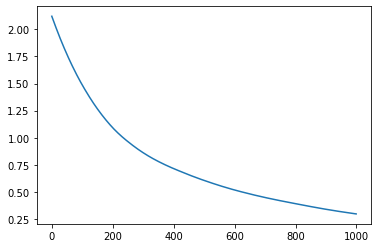

In [235]:
plt.plot(range(len(clf.loss_curve_)), clf.loss_curve_)

In [184]:
from joblib import dump, load
dump(clf, 'mlp2.joblib')

['mlp2.joblib']

In [0]:
clf2 = load('mlp2.joblib')

In [0]:
predicted = clf2.predict(X_scaled)

In [187]:
accuracy_score(y, predicted)

0.9466666666666667

## 支持向量機

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
X = iris.data[0:100,[2,3]]
y = iris.target[0:100]

In [190]:
from sklearn.svm import SVC
clf1 = SVC(kernel = 'linear')
clf1.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [191]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

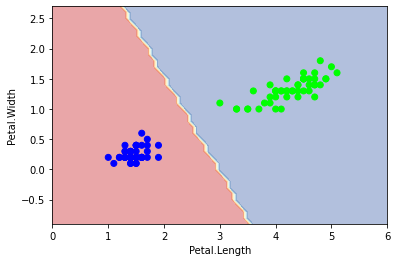

In [193]:
plot_estimator(clf1, X, y)

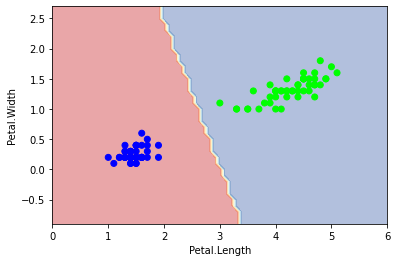

In [194]:
plot_estimator(clf2, X, y)

In [0]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-
0.4,0.5,1],[2,5,1]])

In [0]:
X = data[:, :2]
Y = data[:,2]

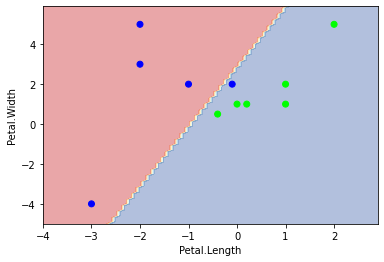

In [197]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

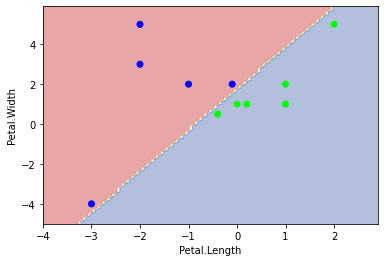

In [198]:
clf = SVC(C=10000.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

In [0]:
X = iris.data[0:100,[2,3]]
y = iris.target[0:100]

In [214]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

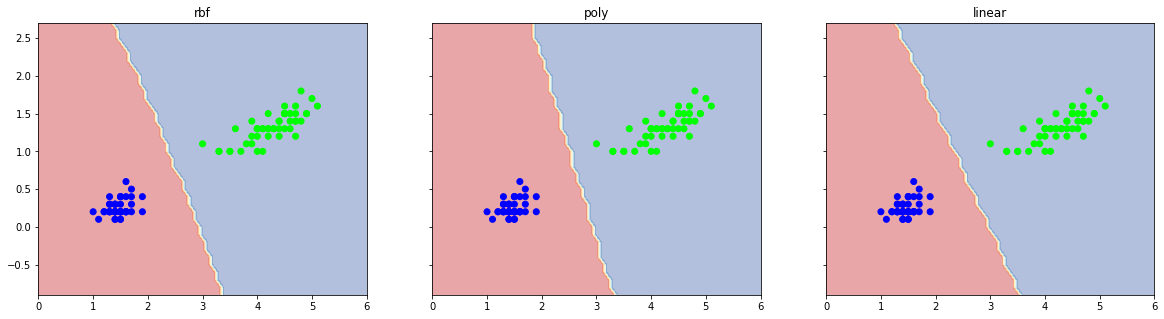

In [215]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    axarr[idx].set_title(title)


In [0]:
X = iris.data[:,[2,3]]
y = iris.target

In [227]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

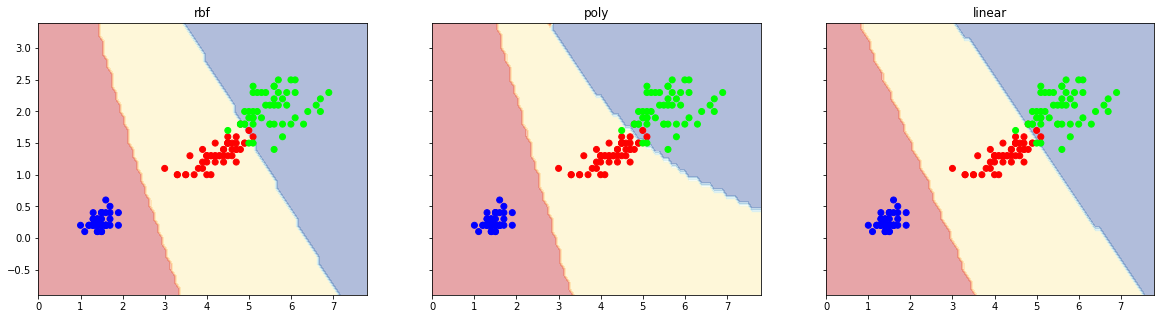

In [228]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    axarr[idx].set_title(title)

In [229]:
predicted1 = clf1.predict(X)
accuracy_score(y, predicted1)

0.9533333333333334

In [230]:
predicted2 = clf2.predict(X)
accuracy_score(y, predicted2)

0.9666666666666667

In [231]:
predicted3 = clf3.predict(X)
accuracy_score(y, predicted3)

0.9666666666666667

## 大數據訓練
- https://scikit-learn.org/0.15/modules/scaling_strategies.html